In [27]:
import numpy as np
from pylab import *
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
#import math

In [28]:
with open("h.csv") as file: # Use file to refer to the file object
   data = file.read()
data=np.fromstring(data, sep='\n')
print(data)

[ 0.003261   0.0076237 -0.022349  -0.054296   0.12573    0.44003
  0.44003    0.12573   -0.054296  -0.022349   0.0076237  0.003261 ]


In [29]:
w, h = signal.freqz(data)

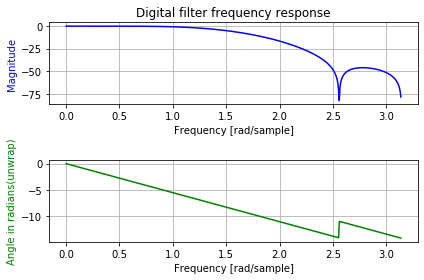

In [30]:
fig = plt.figure()

plt.subplot(2,1,1)
plt.title('Digital filter frequency response')
plt.plot(w, 20*np.log10(abs(h)), 'b')
plt.ylabel('Magnitude', color='b')
plt.xlabel('Frequency [rad/sample]')
plt.grid()

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
#angles=np.pi/180*angles
plt.plot(w, angles, 'g')
plt.ylabel('Angle in radians(unwrap)', color='g')
plt.xlabel('Frequency [rad/sample]')

plt.grid()
plt.axis('tight')
fig.tight_layout()
plt.show()

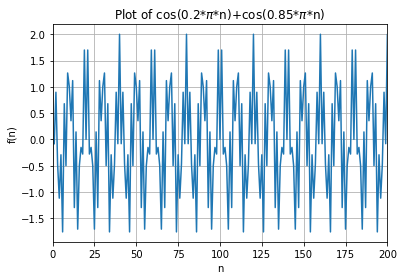

In [48]:
n=np.arange(1,2**10+1,1)
x=np.cos(0.2*np.pi*n)+np.cos(0.85*np.pi*n)
plt.figure()
plt.plot(n,x)
plt.title("Plot of cos(0.2*$\pi$*n)+cos(0.85*$\pi$*n)")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.grid()
plt.xlim([0,200])
plt.show()

In [32]:
'''y = np.zeros(len(x))
for i in np.arange(len(x)):
    y[i]=0
    for k in np.arange(len(data)):
        y[i]+=x[i-k]*data[k]'''
#Linear convolution using direct summation
y=convolve(x, data)

1035

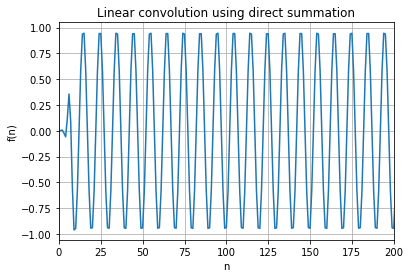

In [43]:
plt.figure()
plt.plot(range(len(n)+len(data)-1), y)
plt.title("Linear convolution using direct summation")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.grid()
plt.xlim([0,200]);plt.show()

In [36]:
#Circular convolution using DFTs
x_=np.concatenate((x, zeros(len(data)-1)))
y1=ifft(fft(x_)*fft(concatenate((data,zeros(len(x_)-len(data))))))

C:\Users\siddp\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


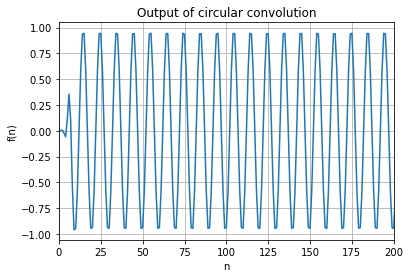

In [47]:
plt.figure()
plt.plot(range(len(y1)), y1)
plt.title("Output of circular convolution")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.grid()
plt.xlim([0,200]); plt.show()

In [50]:
def lin_circular_conv(x,data):
    P = len(data)
    n_ = int(ceil(log2(P)))
    data_ = np.concatenate((data,np.zeros(int(2**n_)-P)))
    P = len(data_)
    n1 = int(ceil(len(x)/2**n_))
    x_ = np.concatenate((x,np.zeros(n1*(int(2**n_))-len(x))))
    y = np.zeros(len(x_)+len(data_)-1)
    for i in range(n1):
        temp = np.concatenate((x_[i*P:(i+1)*P],np.zeros(P-1)))
        y[i*P:(i+1)*P+P-1] += ifft(fft(temp) * fft( np.concatenate((data_,np.zeros(len(temp)-len(data_)))))).real
    return y

In [51]:
y2 = lin_circular_conv(x,data)
len(y2)

1039

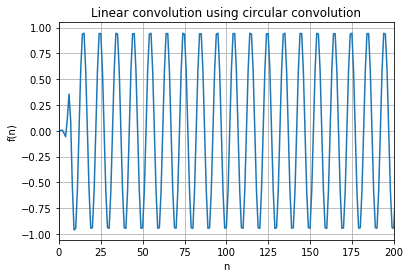

In [52]:
plt.figure()
plt.plot(range(len(y2)), y2)
plt.title("Linear convolution using circular convolution")
plt.xlabel("n")
plt.ylabel("f(n)")
plt.grid()
plt.xlim([0,200]); plt.show()

In [63]:
#Circular correlation
with open("x1.csv") as file2:
    data2=file2.readlines()
    data2=asarray([complex(i[:-1].replace('i','j')) for i in data2], dtype = 'complex')    
print(data2)

[ 1.       +0.0000e+00j  0.99997  -7.4888e-03j  0.99975  -2.2465e-02j
  0.99899  -4.4918e-02j  0.9972   -7.4819e-02j  0.9937   -1.1210e-01j
  0.98766  -1.5662e-01j  0.9781   -2.0816e-01j  0.96388  -2.6635e-01j
  0.94375  -3.3066e-01j  0.91637  -4.0034e-01j  0.88032  -4.7439e-01j
  0.83419  -5.5148e-01j  0.77664  -6.2995e-01j  0.70644  -7.0777e-01j
  0.62265  -7.8250e-01j  0.52465  -8.5132e-01j  0.41232  -9.1104e-01j
  0.28614  -9.5819e-01j  0.14737  -9.8908e-01j -0.0018722-1.0000e+00j
 -0.15847  -9.8736e-01j -0.31826  -9.4800e-01j -0.47603  -8.7943e-01j
 -0.62558  -7.8016e-01j -0.75986  -6.5009e-01j -0.87128  -4.9078e-01j
 -0.95209  -3.0581e-01j -0.99489  -1.0093e-01j -0.99327  +1.1582e-01j
 -0.94251  +3.3419e-01j -0.84033  +5.4207e-01j -0.68765  +7.2604e-01j
 -0.48915  +8.7220e-01j -0.25369  +9.6729e-01j  0.0056166+9.9998e-01j
  0.27176  +9.6237e-01j  0.52465  +8.5132e-01j  0.74256  +6.6978e-01j
  0.90396  +4.2761e-01j  0.98989  +1.4181e-01j  0.98646  -1.6401e-01j
  0.88732  -4.6115e-

In [94]:
Dshifted=np.roll(data2, 5)
corr=ifft(conj(fft(data2))*(fft(Dshifted)))
'''
dataabs=abs(data2)
plot(range(len(dataabs)), dataabs)
xlim([1,30]); show()
dataabs2=abs(Dshifted)
plot(range(len(dataabs2)), dataabs2)
xlim([1,30]); show()'''

'\ndataabs=abs(data2)\nplot(range(len(dataabs)), dataabs)\nxlim([1,30]); show()\ndataabs2=abs(Dshifted)\nplot(range(len(dataabs2)), dataabs2)\nxlim([1,30]); show()'

C:\Users\siddp\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


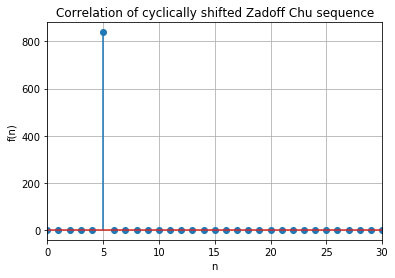

In [95]:
plt.figure()
plt.title("Correlation of cyclically shifted Zadoff Chu sequence")
plt.stem(range(len(corr)), abs(corr))
plt.xlabel("n")
plt.ylabel("f(n)")
plt.grid()
xlim([0,30]); plt.show()